# Water Quality Probility Prediction using Random Forest Classifier



### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("D:\Congnizance_2020\Mentor_Task\Datasets\water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [18]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [50]:
df['ph'] = df['ph'].fillna(df['ph'].std())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].std())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].std())

In [64]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [51]:
X_data = df.drop(columns='Potability', axis=1)
Y_data = df['Potability']

### Data Standardization

In [52]:
scalar = StandardScaler()
X_data = scalar.fit_transform(X_data)
print(X_data)

[[-2.54735465e-02  2.59194711e-01 -1.39470871e-01 ... -1.18065057e+00
   1.30543373e+00 -1.28629758e+00]
 [-2.28471739e+00 -2.03641367e+00 -3.85986650e-01 ...  2.70597240e-01
  -6.39186284e-01  6.84217891e-01]
 [ 6.97319183e-01  8.47664833e-01 -2.40047337e-01 ...  7.81116857e-01
   8.00012586e-04 -1.16736546e+00]
 ...
 [ 1.59565368e+00 -6.26829230e-01  1.27080989e+00 ... -9.81329234e-01
   2.18037800e-01 -8.56006782e-01]
 [-1.32494885e+00  1.04135450e+00 -1.14405809e+00 ... -9.42063817e-01
   7.02755628e-01  9.50797383e-01]
 [ 5.44611034e-01 -3.85462310e-02 -5.25811937e-01 ...  5.60940070e-01
   7.79510303e-01 -2.12445866e+00]]


### Spliting the data into train and test dataset

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, shuffle=True)

### Data Visualization

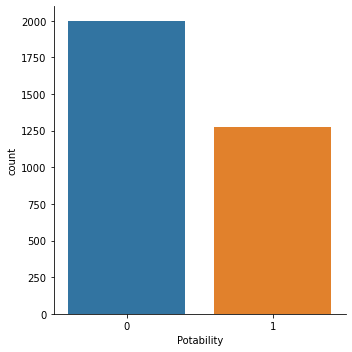

In [54]:
sns.catplot(x="Potability", data=df, kind="count")

In [55]:
correlation = df.corr()

<AxesSubplot:>

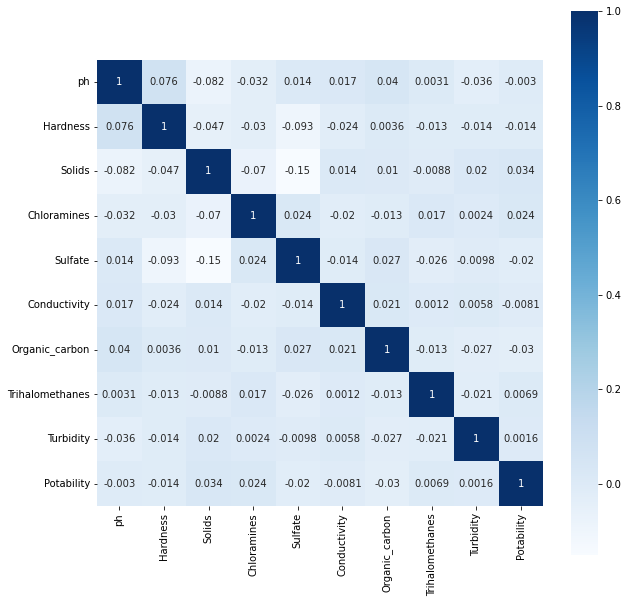

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, annot=True, cmap='Blues')

### Model Training

In [61]:
classifier = RandomForestClassifier(n_estimators=5, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [62]:
column_name = list(df.columns)
fn = column_name[0:9]
cn = ['0','1']

In [63]:
len(classifier.estimators_)

5

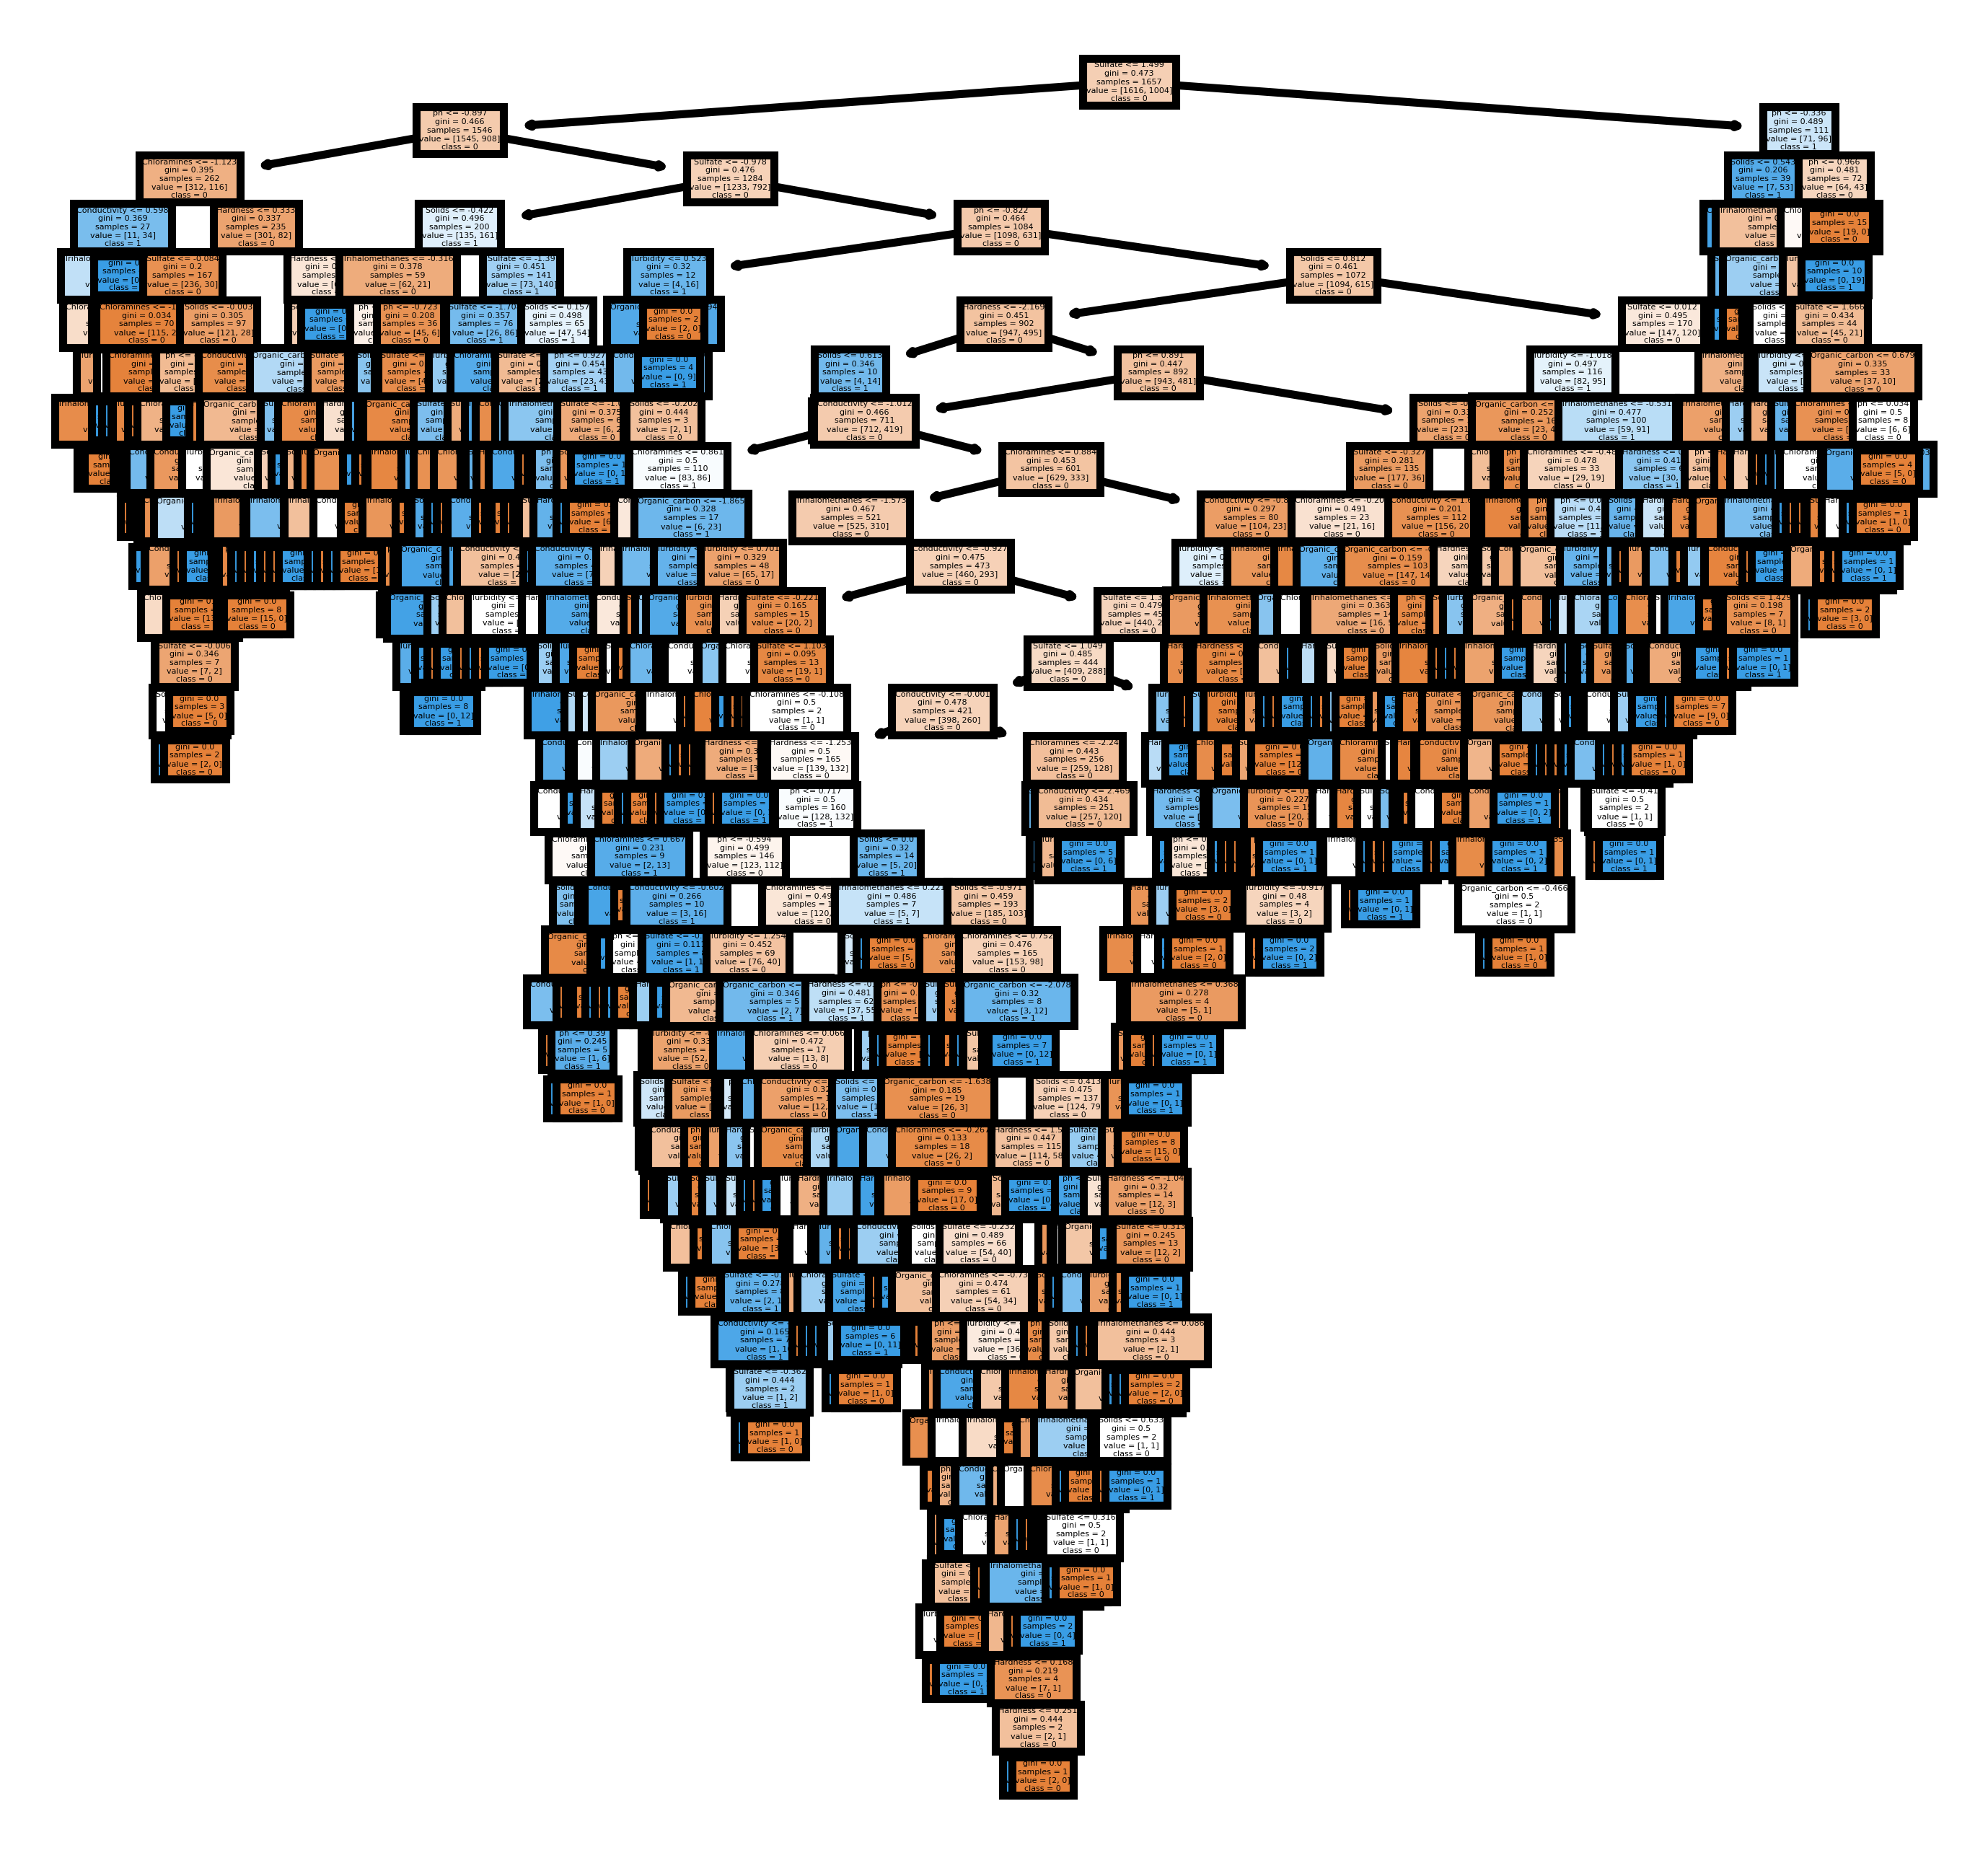

In [66]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(classifier.estimators_[0], feature_names = fn, class_names=cn, filled = True);

### Model Evaluation

In [67]:
y_pred_test = classifier.predict(X_test)
print("Model Accuracy : ", 100*(accuracy_score(y_test, y_pred_test)))

Model Accuracy :  62.19512195121951


In [68]:
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[302 103]
 [145 106]]

True Positives(TP) =  302

True Negatives(TN) =  106

False Positives(FP) =  103

False Negatives(FN) =  145


<AxesSubplot:>

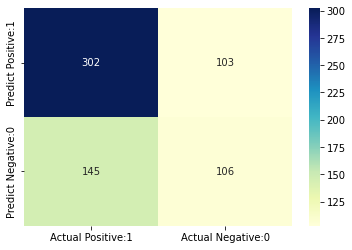

In [69]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Making Prediction Model

In [71]:
input = np.array([7.14, 196.56, 16911.2, 6.89, 320.1, 520.11, 12.85, 66.81, 4.02])
input = input.reshape(1,-1)
prediction = classifier.predict(input)
if prediction == 1:
    print("Potable")
else:
    print("Not Potable")

Not Potable
